# Analyse Score distribution along social dimensions

To create an hypothesis of social disparities in the dataset we need to descriptivly analyse the score distributions along the identified social dimensions.  
Our hypothesis so far is, according to differences in income, that the following dimensions are most likely differently distributed w.r.t. score:
- age
- sex
- east_west

As an descriptive approximation we first use the rating-levels of the SCHUFA as an interpretation of the actual score. After looking at the ratings, we do some statistical tests with the most interessting social groups using the continuous score variable.

In the end we want to decide a branche-score we want to use for our further analysis as well as the social groups that seem most interessting, so we can formulate our hypothesis.

To do so, we Analyse the distribution of score-ratings on the following levels:
1. The whole dataset
2. On dataset with scores over a specified cut-off
3. On a more homogenous subsample, consisting of selected social groups.

We do that process for all scores we want to analyse and decide for the most interesting scores and version according to their results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import analysis_helpers as hstats

In [2]:
def group_stacked(feat, df, domain, score_feat):
    print("The proportion plots are arranged from domains highest version to lowest")
    #feat = "generation_groups"
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
    
    score_3 = df[np.all([
            df["domain"]==domain, 
            df["version"]==3], axis=0)]
    score_2 = df[np.all([
            df["domain"]==domain, 
            df["version"]==2], axis=0)]
    score_1 = df[np.all([
            df["domain"]==domain, 
            df["version"]==1], axis=0)]

    # For version 3
    score_count = score_3.groupby([score_feat, feat])[score_feat].count()

    for idx in score_count.index.levels[1]:
        score_count.loc[:, idx] = score_count.loc[slice(None),slice(idx), :] / score_count.loc[slice(None),slice(idx), :].sum()

    score_count.unstack(score_feat).fillna(0).plot(kind="bar", stacked=True, ax=axes[0])
    axes[0].set_title("Score-Version 3")
    axes[0].set_ylabel("rel. Häufigkeit")

    # For version 2
    score_count = score_2.groupby([score_feat, feat])[score_feat].count()

    for idx in score_count.index.levels[1]:
        score_count.loc[:, idx] = score_count.loc[slice(None),slice(idx), :] / score_count.loc[slice(None),slice(idx), :].sum()

    score_count.unstack(score_feat).fillna(0).plot(kind="bar", stacked=True, ax=axes[1])
    axes[1].set_title("Score-Version 2")
    axes[1].set_ylabel("rel. Häufigkeit")

    # For version 1
    score_count = score_1.groupby([score_feat, feat])[score_feat].count()

    for idx in score_count.index.levels[1]:
        score_count.loc[:, idx] = score_count.loc[slice(None),slice(idx), :] / score_count.loc[slice(None),slice(idx), :].sum()

    score_count.unstack(score_feat).fillna(0).plot(kind="bar", stacked=True, ax=axes[2])
    axes[2].set_title("Score-Version 1")
    axes[2].set_ylabel("rel. Häufigkeit")
    
    fig.suptitle("Relatives Verhältnis der Ratingstufen pro Score-Version")

In [3]:
# Scores for nominal analysis
def get_scores(domain, version, feat, df):
    bool_mask = np.all([df["domain"]==domain, df["version"]==version], axis=0)
    return df[bool_mask][feat]

In [4]:
def get_boolean_mask(df, domain, version):
    return np.all([df["domain"]==domain, df["version"]==version], axis=0)

## Specify paths, load data and define functions for plotting

In [5]:
data_path = "/media/veracrypt1/SPON_dataset_tables/"
plot_path = "plots/"

In [6]:
table2 = pd.read_csv(data_path + "datasets_v2/20190703_analysis_dataset_versandbank_final.csv", sep=";")

In [7]:
domain = "Versandhandel"

In [8]:
versand = table2[table2["domain"]==domain]

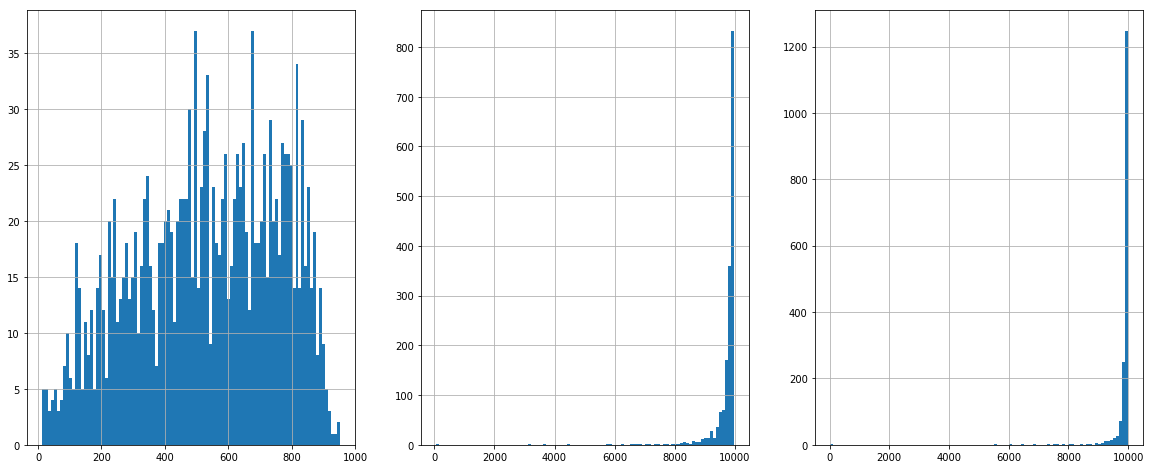

In [9]:
# Distribution of scores
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

for i in range(3):
    versand[versand.version==i+1]["score"].hist(bins=100, ax=axes[i])

In [10]:
versand.loc[versand.version==2, "score"] = versand.loc[versand.version==2, "score"].apply(lambda x: 1000-np.log(10000-x)*100)
versand.loc[versand.version==3, "score"] = versand.loc[versand.version==3, "score"].apply(lambda x: 1000-np.log(10000-x)*100)

/home/phil/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


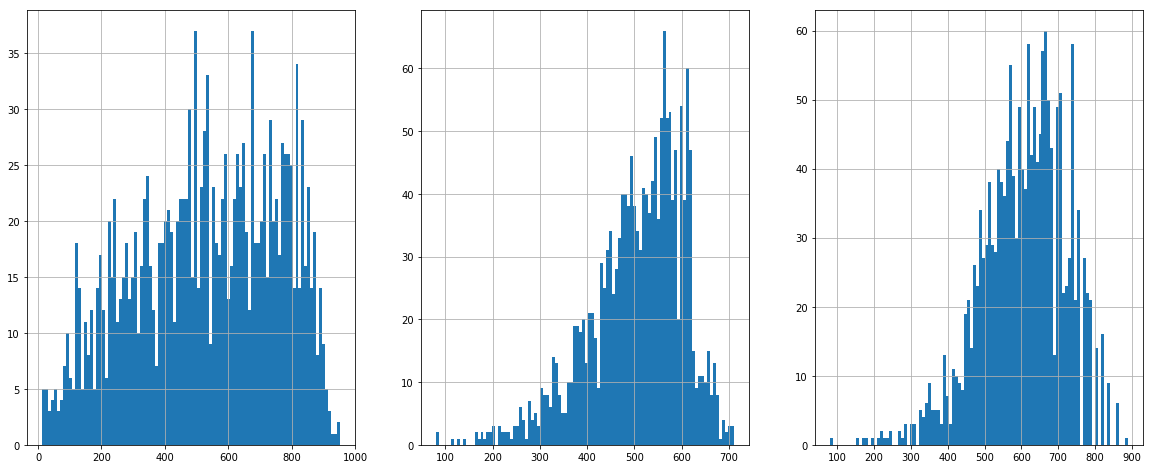

In [11]:
# Distribution of scores
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))

for i in range(3):
    versand[versand.version==i+1]["score"].hist(bins=100, ax=axes[i])

In [12]:
# Devide different types of features
metric_feats = ['numberOfActiveLoans', 'numberOfChildren','numberOfCreditCards', 'numberOfGiroAccounts', 'numberOfMobileContracts', 'numberOfPaidOffLoans', 'relocation', 'yearOfBirth']
ordinal_feats = ['activeLoanAmount', 'monthlyIncome', 'paidOffLoanAmount', 'age_groups', 'generation_groups']
nominal_feats = ['employment', 'familyStatus', 'housing', 'sex', 'east_west']

Text(0, 0.5, 'Score')

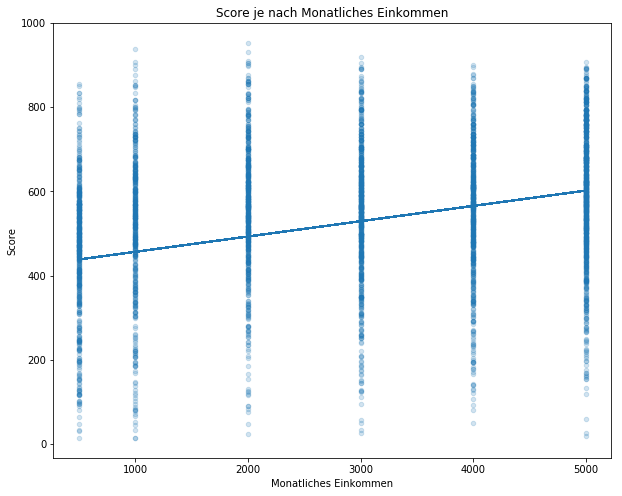

In [13]:
df_temp = pd.DataFrame([versand[versand.version==1].monthlyIncome, versand[versand.version==1].score]).T.dropna()

b, m = np.polynomial.polynomial.polyfit(df_temp.monthlyIncome.dropna().values, df_temp.score.dropna().values, 1)

ax = versand.plot(kind="scatter", x="monthlyIncome", y="score", figsize=(10, 8), alpha=.2)
ax.plot(versand.monthlyIncome.values, b + m * versand.monthlyIncome.values, '-')

ax.set_title("Score je nach Monatliches Einkommen")
ax.grid(False)
ax.set_xlabel("Monatliches Einkommen")
ax.set_ylabel("Score")

Text(0, 0.5, 'Score')

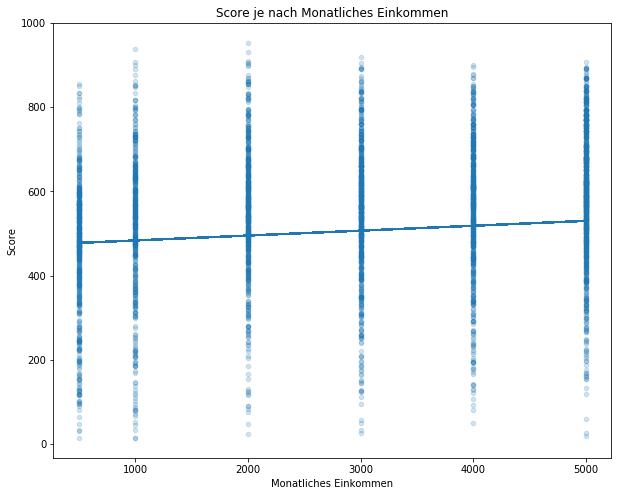

In [14]:
df_temp = pd.DataFrame([versand[versand.version==2].monthlyIncome, versand[versand.version==2].score]).T.dropna()

b, m = np.polynomial.polynomial.polyfit(df_temp.monthlyIncome.dropna().values, df_temp.score.dropna().values, 1)

ax = versand.plot(kind="scatter", x="monthlyIncome", y="score", figsize=(10, 8), alpha=.2)
ax.plot(versand.monthlyIncome.values, b + m * versand.monthlyIncome.values, '-')

ax.set_title("Score je nach Monatliches Einkommen")
ax.grid(False)
ax.set_xlabel("Monatliches Einkommen")
ax.set_ylabel("Score")

Text(0, 0.5, 'Score')

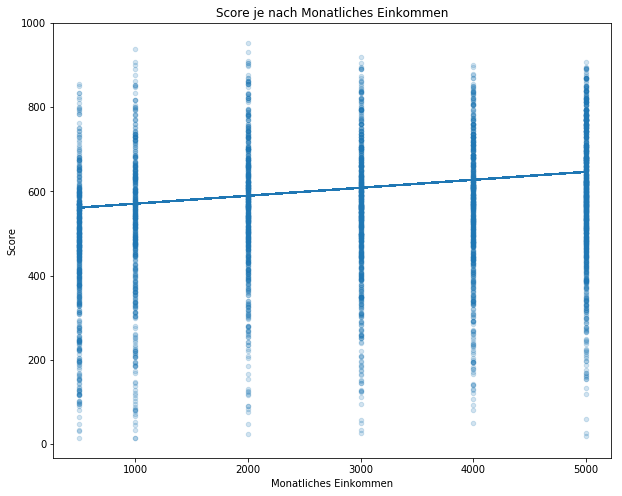

In [15]:
df_temp = pd.DataFrame([versand[versand.version==3].monthlyIncome, versand[versand.version==3].score]).T.dropna()

b, m = np.polynomial.polynomial.polyfit(df_temp.monthlyIncome.dropna().values, df_temp.score.dropna().values, 1)

ax = versand.plot(kind="scatter", x="monthlyIncome", y="score", figsize=(10, 8), alpha=.2)
ax.plot(versand.monthlyIncome.values, b + m * versand.monthlyIncome.values, '-')

ax.set_title("Score je nach Monatliches Einkommen")
ax.grid(False)
ax.set_xlabel("Monatliches Einkommen")
ax.set_ylabel("Score")

In [16]:
import seaborn as sns

In [17]:
def mbox_score_plot(df, col1, name, chars, attr=None):
    score_l = ["Score", "log max scaled Score", "log max scaled Score"]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22,8))
    for v in range(3):
        ax = sns.boxplot(x=col1, y="score", data=df[df.version==v+1], color="skyblue", order=chars, ax=axes[v])
        ax.set_title("Score je nach %s"%name)
        ax.grid(False)
        ax.set_xlabel(name)
        ax.set_ylabel("%s Version %s"%(score_l[v], v+1))
        if attr is not None:
            ax.set_xticklabels(attr)    
        
        plt.suptitle("")
        
def scatter_score_plot(df, col1, name):
    score_l = ["Score", "log max scaled Score", "log max scaled Score"]
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22,8))
    for v in range(3):
        ax = df[df.version==v+1].plot(kind="scatter", x=col1, y="score", ax=axes[v])
        ax.set_title("Score je nach %s"%name)
        ax.grid(False)
        ax.set_xlabel(name)
        ax.set_ylabel("%s Version %s"%(score_l[v], v+1))

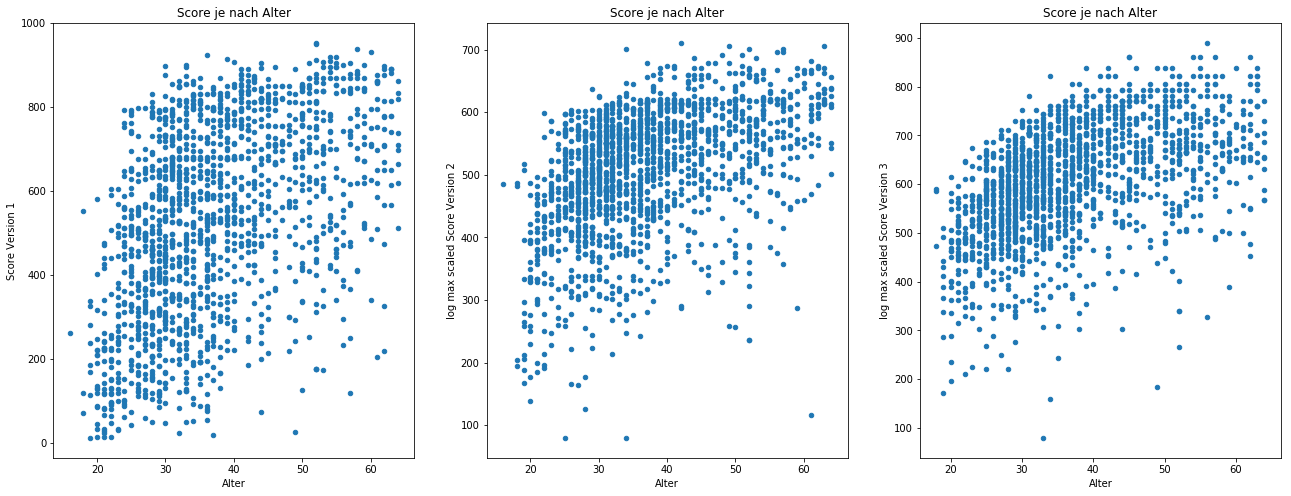

In [18]:
scatter_score_plot(versand, "age", "Alter")

male      1436
female     162
Name: sex, dtype: int64


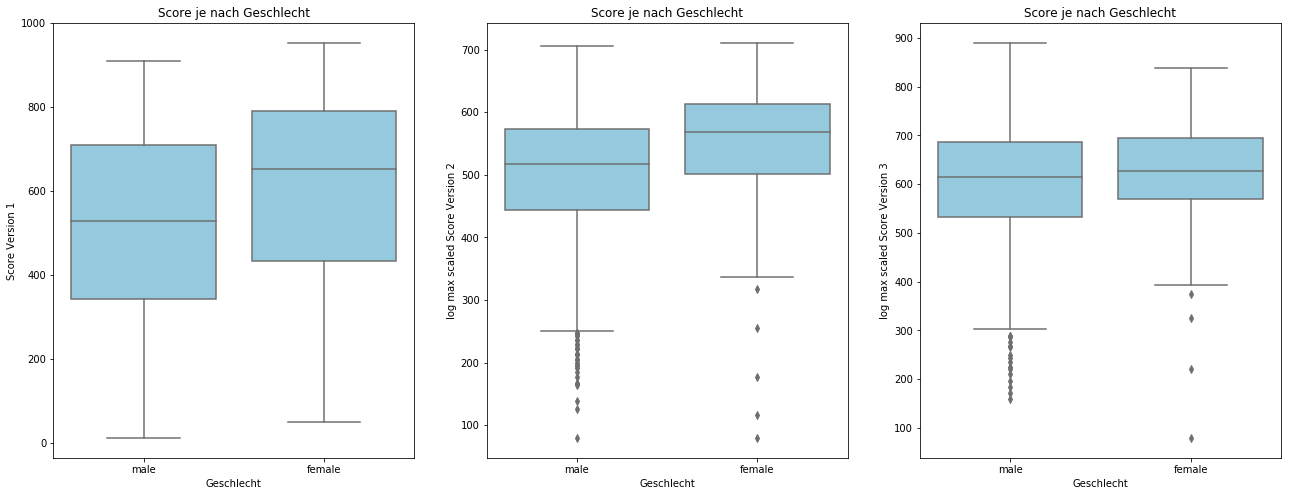

In [19]:
print(versand[versand.version==1].sex.value_counts())
mbox_score_plot(versand, "sex", "Geschlecht", ["male", "female"])

The proportion plots are arranged from domains highest version to lowest


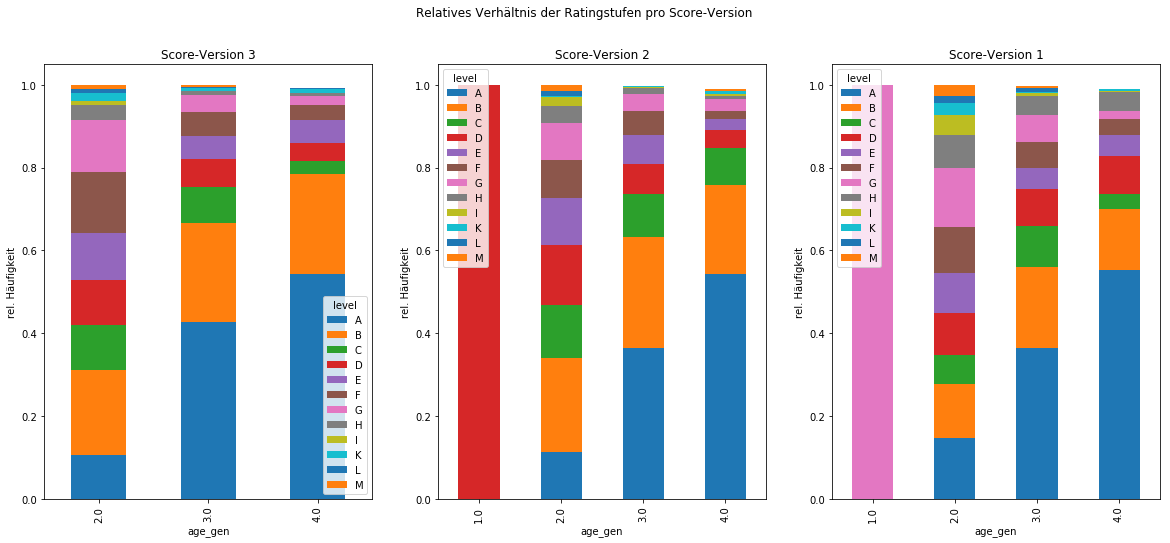

In [20]:
group_stacked("age_gen", versand, domain, "level")

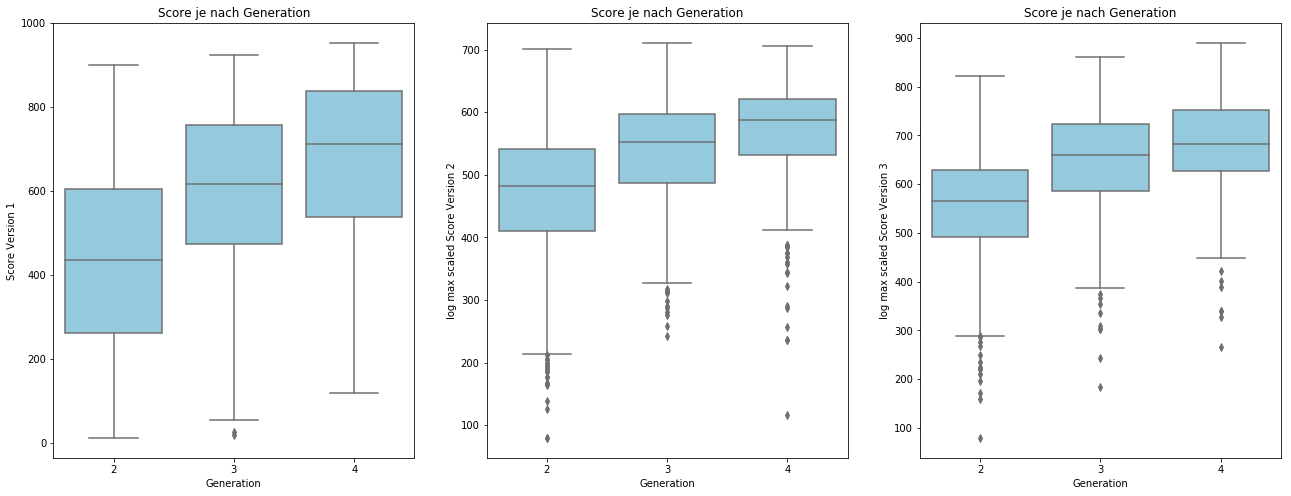

In [21]:
mbox_score_plot(versand, "age_gen", "Generation", [2, 3, 4])

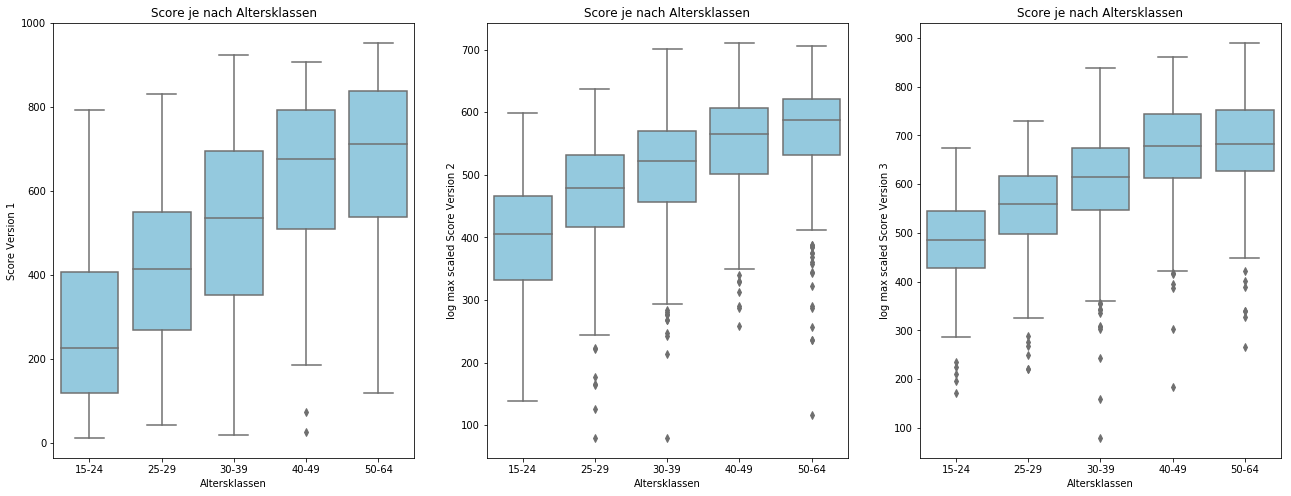

In [22]:
mbox_score_plot(versand, "age_class", "Altersklassen", ['15-24', '25-29', '30-39', '40-49', '50-64'])

west    1260
east     333
Name: east_west, dtype: int64


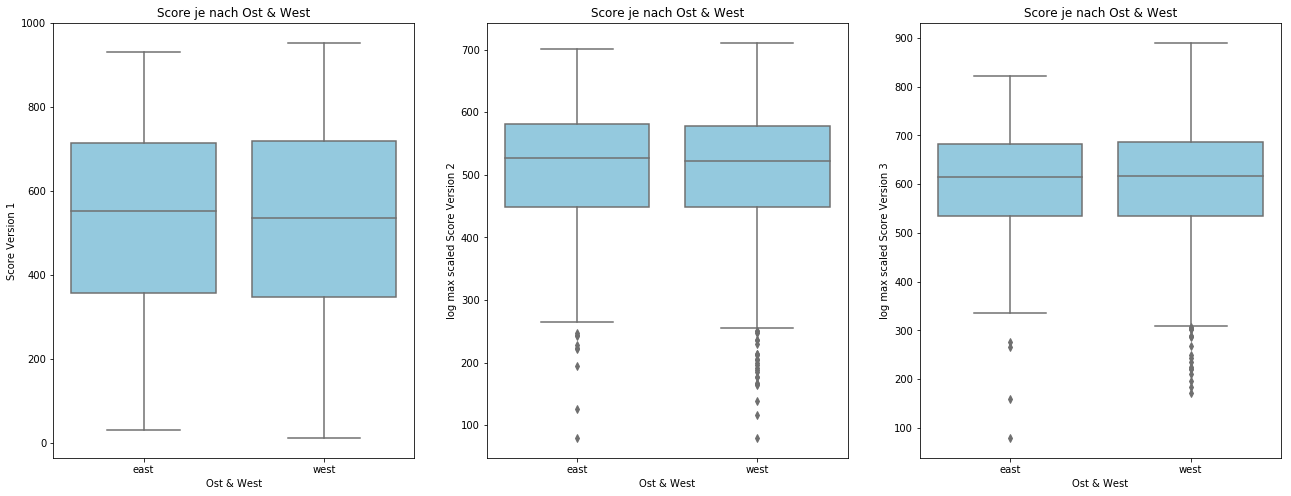

In [23]:
print(versand[versand.version==1].east_west.value_counts())
mbox_score_plot(versand, "east_west", "Ost & West", ["east", "west"])

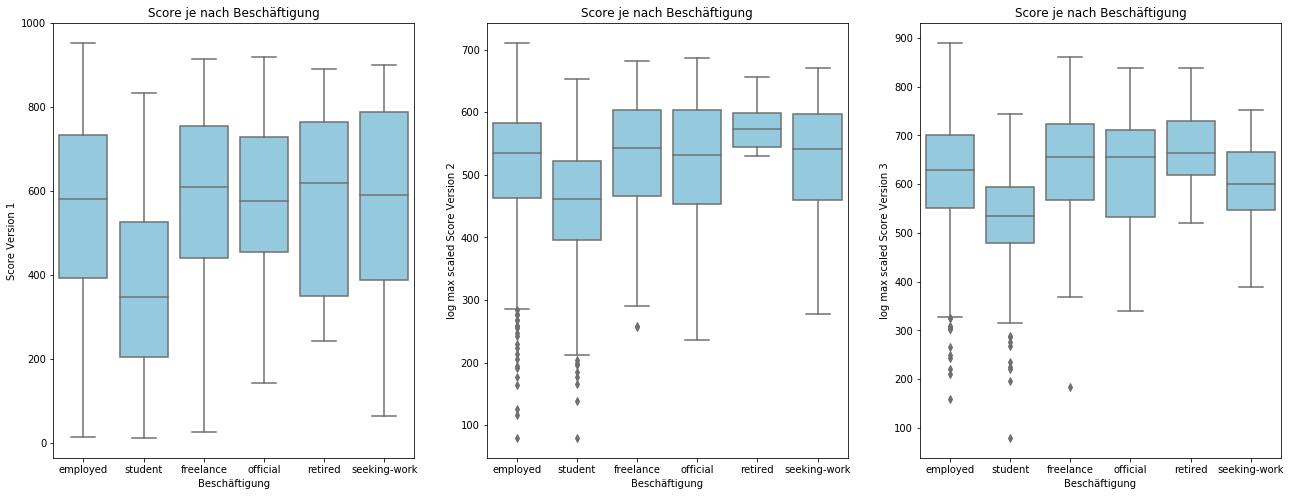

In [24]:
mbox_score_plot(versand, "employment", "Beschäftigung", ["employed", "student", "freelance", "official", "retired", "seeking-work"])

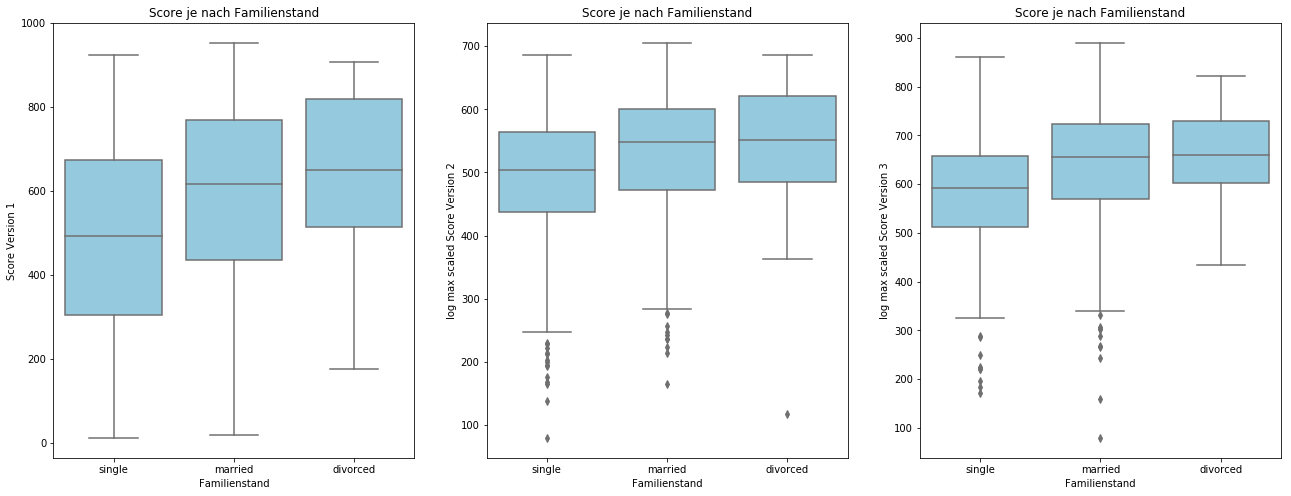

In [25]:
mbox_score_plot(versand, "familyStatus", "Familienstand", ["single", "married", "divorced"])

In [26]:
versand[["score", "domain", "version", "age", "relocation", "numberOfChildren"]].groupby(["domain", "version"]).corr(method="pearson")["score"].unstack().T

domain           Versandhandel                    
version                    1.0       2.0       3.0
age                   0.481097  0.457574  0.492379
numberOfChildren      0.156334  0.153989  0.204926
relocation           -0.242913 -0.241385 -0.258917
score                 1.000000  1.000000  1.000000

In [27]:
versand[["score", "domain", "version", "monthlyIncome"]].groupby(["domain", "version"]).corr(method="spearman")["score"].unstack().T

domain        Versandhandel                    
version                 1.0       2.0       3.0
monthlyIncome      0.260975  0.190197  0.278756
score              1.000000  1.000000  1.000000

In [28]:
# anova
print("Yellow means rejecting the null-hypothesis according to a p-value < 0.05")

anova_stats = hstats.get_anova_stats(versand[get_boolean_mask(versand, domain, 1)][nominal_feats], 
                                     get_scores(domain, 1, "score", versand), "score")

anova_stats.style.apply(hstats.highlight_significance_anova)

Yellow means rejecting the null-hypothesis according to a p-value < 0.05


,F-test,H-test,df1,df2,Normal-test,Variance-test
employment,"(31.659296426782248, 1.0415275488250361e-30)","(134.92318097953577, 2.1447287203987733e-27)",5,1473,"[(0.9646477699279785, 2.833812252510306e-14), (0.9663189053535461, 0.0004642933781724423), (0.9621332287788391, 0.027495907619595528), (0.9194930195808411, 0.1892337054014206), (0.927608847618103, 0.02992834523320198), (0.9636512398719788, 4.286355306248879e-06)]","(0.6654070101689459, 0.649761735936938)"
familyStatus,"(25.59697162227338, 4.0089087996739577e-16)","(71.550860226983, 1.98665715979233e-15)",3,1407,"[(0.9439578056335449, 0.014915259554982185), (0.9614802002906799, 1.7548670849798498e-11), (0.9719046950340271, 9.226691632946427e-11), (0.9225276112556458, 0.37851935625076294)]","(1.4032421695976471, 0.2401683359394401)"
housing,"(51.64446275722697, 2.2351277831062154e-22)","(94.08404709167594, 3.714571792422348e-21)",2,1420,"[(0.9669955968856812, 5.95225691651935e-13), (0.9588939547538757, 3.257551783875101e-09), (0.9716399908065796, 0.0016832167748361826)]","(7.34390252217464, 0.0006713758169067231)"
sex,"(29.661754450686846, 5.947926792681752e-08)","(28.251729099502864, 1.0651943598647445e-07)",1,1596,"[(0.9548160433769226, 4.281699875718914e-05), (0.9665210843086243, 1.0251049980842047e-17)]","(1.4804237599576013, 0.2238881295004382)"
east_west,"(0.16181088400317623, 0.6875487579824268)","(0.1397660398557516, 0.7085137111616825)",1,1591,"[(0.968457818031311, 1.2209992519274238e-06), (0.9682281017303467, 5.331176665624099e-16)]","(0.4104806141627012, 0.5218179310025923)"


In [29]:
# anova
print("Yellow means rejecting the null-hypothesis according to a p-value < 0.05")

anova_stats = hstats.get_anova_stats(versand[get_boolean_mask(versand, domain, 2)][nominal_feats], 
                                     get_scores(domain, 2, "score", versand), "score")

anova_stats.style.apply(hstats.highlight_significance_anova)

Yellow means rejecting the null-hypothesis according to a p-value < 0.05


,F-test,H-test,df1,df2,Normal-test,Variance-test
employment,"(23.908994009097835, 3.278499202279851e-23)","(114.85892149523352, 3.846459399034236e-23)",5,1519,"[(0.948972225189209, 8.159174731783219e-18), (0.9543969035148621, 1.4656057828688063e-05), (0.9501587748527527, 0.006855899002403021), (0.8841780424118042, 0.054792825132608414), (0.9478373527526855, 0.10576138645410538), (0.9579152464866638, 9.035932180267991e-07)]","(1.8224067914199826, 0.10538170993908429)"
familyStatus,"(20.48407401298702, 5.330582667598194e-13)","(66.21274920713496, 2.7600161719108757e-14)",3,1441,"[(0.8947356343269348, 0.00018763831758406013), (0.9545034766197205, 4.649179804160075e-13), (0.9544491171836853, 1.7801420602349405e-14), (0.8515123724937439, 0.07743199914693832)]","(0.584306718757955, 0.6253338558981478)"
housing,"(59.73796375925854, 1.1425570375995378e-25)","(121.46703727895135, 4.205019250276066e-27)",2,1468,"[(0.9377853870391846, 1.18288905886372e-18), (0.9555200338363647, 4.891796967498863e-10), (0.975169837474823, 0.003831474808976054)]","(0.8937342620565928, 0.40934760731411923)"
sex,"(39.79002379570782, 3.6244476003302886e-10)","(47.9658333554588, 4.337114848600666e-12)",1,1648,"[(0.8800985217094421, 1.368659907630132e-10), (0.9604549407958984, 1.333237174356811e-19)]","(3.3754274241544597, 0.06635537512532098)"
east_west,"(0.09412900866071221, 0.7590311459029881)","(0.032664519906078236, 0.8565769322133554)",1,1639,"[(0.9365676641464233, 7.928393358502817e-11), (0.9597849249839783, 1.7198795130893899e-18)]","(0.19203759743552826, 0.6612838752270782)"


In [30]:
# anova
print("Yellow means rejecting the null-hypothesis according to a p-value < 0.05")

anova_stats = hstats.get_anova_stats(versand[get_boolean_mask(versand, domain, 3)][nominal_feats], 
                                     get_scores(domain, 3, "score", versand), "score")

anova_stats.style.apply(hstats.highlight_significance_anova)

Yellow means rejecting the null-hypothesis according to a p-value < 0.05


,F-test,H-test,df1,df2,Normal-test,Variance-test
employment,"(33.72329141749998, 9.492490748859833e-33)","(160.9678418157867, 6.155642300632025e-33)",5,1525,"[(0.9824531674385071, 1.9618675572985467e-09), (0.9699567556381226, 0.0007799791055731475), (0.9357476234436035, 0.0006837724940851331), (0.9891523718833923, 0.9992141723632812), (0.9605597257614136, 0.23766182363033295), (0.9587491750717163, 1.1378509725545882e-06)]","(1.6502495601572016, 0.1436439676384611)"
familyStatus,"(33.50921957687324, 6.105970440641827e-21)","(105.73809215172601, 9.065073921580448e-23)",3,1453,"[(0.9816827178001404, 0.612217128276825), (0.9665693044662476, 7.202710650133781e-11), (0.9837006330490112, 1.7853794531674794e-07), (0.9691672325134277, 0.8830185532569885)]","(1.3952130943892127, 0.24256503347521186)"
housing,"(86.89215722913595, 2.123619872179385e-36)","(162.82909171100488, 4.386437930134611e-36)",2,1474,"[(0.9722529649734497, 5.616527208596178e-12), (0.9803557395935059, 1.8172944692196324e-05), (0.9885050058364868, 0.18797510862350464)]","(1.0336360017522621, 0.35596892329194246)"
sex,"(4.350998329260055, 0.03714008086782957)","(4.4611692143881205, 0.03467375621124204)",1,1655,"[(0.9416072964668274, 3.2143534554052167e-06), (0.9854432940483093, 3.994518604777397e-11)]","(3.9620504705245523, 0.04670122154883108)"
east_west,"(0.44515909122501424, 0.5047363562624546)","(0.2501060389036615, 0.6170004221042213)",1,1646,"[(0.9647483229637146, 3.5038578971580137e-07), (0.9855384826660156, 3.564878947592831e-10)]","(0.9854495500095942, 0.32100299917210273)"
